# Projeto 3 - Parte 2/2 Buscador de Imagens

## Imports

In [51]:
from keras_preprocessing import image
from keras.applications.mobilenetv2 import MobileNetV2, decode_predictions
from keras.applications.mobilenetv2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import keras
import os

## Funções

In [2]:
def mnetv2_input_from_image(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return preprocess_input(x)

def read_imgs(pastas, initial, max_items, shuf):
    list_Names  = []
    list_Imgs   = []
    
    for pasta in pastas:
        dir_Name = "./dataset-projeto-3-2/" + pasta + "/"
        img_Name = os.listdir(dir_Name)
        
        if(shuf):
            shuffle(img_Name)
            
        for i in range(initial, max_items):
            name = dir_Name + img_Name[i]
            list_Imgs.append(cv2.imread(name))
            list_Names.append(name)

    return list_Names, list_Imgs

def img_format(list_Names, h = 224, w = 224):
    list_Imgs = []
    for img in list_Names:
        list_Imgs.append(image.load_img(img, target_size=(h, w)))
    
    return list_Imgs

def mnetv2_input_from_image(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return preprocess_input(x)


def predit_Image(list_Imgs, list_Names):
    list_Imgs  = list_Imgs[:2]
    list_Names = list_Names[:2]
    dic = {}
    for img, path in zip(list_Imgs, list_Names) :
        process = mnetv2_input_from_image(img)
        model = MobileNetV2(input_shape=None, alpha=1.0, depth_multiplier=1, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
        preds = model.predict(process)
        preds_format = decode_predictions(preds, top = 1)[0]
       
        class_Name = preds_format[0][1]
        value = preds_format[0][2]
            
        if (class_Name not in dic):
            dic[class_Name] = []
        
        dic[class_Name].append((path, value))

    return dic

def get_Imgs(load_dic, category):
    list_index = []
    for i in range(len(load_dic[category])):
        list_index.append(load_dic[category][0][1])

    list_aux = np.argsort(list_index)[::-1]

    list_load_imgs = []
    for i in list_aux:
        list_load_imgs.append(load_dic[category][i][0])
    
    return list_load_imgs   

def plot_Imgs(list_load_imgs):
    for img in list_load_imgs:
        img_plt = cv2.imread(img)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img_plt, cv2.COLOR_BGR2RGB))
        plt.show()

## Carregamento do dataset

In [3]:
pastas = os.listdir("./dataset-projeto-3-2")
list_Names, _ = read_imgs(pastas, 0, 5, 0)
list_Imgs = img_format(list_Names)

## Treinamento das imagens por classificação 

In [43]:
dic = predit_Image(list_Imgs, list_Names)

hook 0.45275557
hook 0.80470836


## Escrita do dicionario de treinamento em um arquivo txt 

In [44]:
with open('train.pickle', 'wb') as handle:
    pickle.dump(dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Leitura do arquivo de treinamento

In [45]:
with open('train.pickle', 'rb') as handle:
    load_dic = pickle.load(handle)

## Seleção da categoria de busca

In [55]:
category = input("Escolha uma caregoria: ")

Escolha uma caregoria: hook


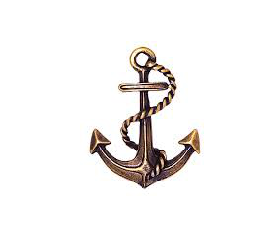

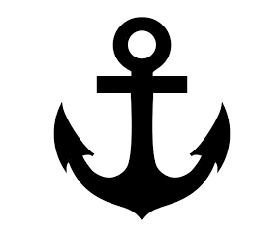

In [56]:
if (category in load_dic):
    list_load_imgs = get_Imgs(load_dic, category)
    plot_Imgs(list_load_imgs)
    
else:
    print("Categoria Invalida")